In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import os 
import seaborn as sns
import glob
import natsort

In [2]:
import seaborn as sns
import copy

def load_data(save_path):
    datas = list()
    path_list = glob.glob(save_path)
    path_list = natsort.natsorted(path_list)
    data_temp = get_concat_glob(path_list)
    data_temp["a1"] = data_temp["a1"] * 100
    data_temp["a3"] = data_temp["a3"] * 100
    data_temp['Distribution'] = data_temp['distribution'] .map({0: "IID partition", 
                                                                0.3: "Non-IID partition (α=0.3)"})
    return data_temp

In [3]:
def get_concat_glob(paths):
    data_ = []
    for i, path in enumerate(paths):

        if "LN" in path: continue
        if "WD" in path: continue
        if "FCs" in path: continue
        if "G1" in path: continue
        if "Mean" in path: continue
        if "gs" in path: continue        
        if "hs" in path: continue
        if "Mask" in path: continue
        if "LR001" in path: continue
        
        data = pd.read_csv(path)
        data["Mode"] = data["mode"]
        data["Scaling"] = "vanilla"

        if "Output_GU" in path and "__GU" in path and "LR" in path:
            data["Scaling"] = path.split("__GU")[1].split("/")[0] 
            # continue
        elif "__GU" in path: 
            number = float(path.split("__GU")[1].split("/")[0])
            # print(number)
            data["Scaling"] = "GU" + str(number)
        elif "__GGU" in path: 
            number = float(path.split("__GGU")[1].split("/")[0])
            # print(number)
            data["Scaling"] = "GGU" + str(number)
        # else:
        #     print(path)

        if len(data_) == 0: 
            # print(path)
            data_ = data
        else: 
            # print(path)
            data_ = pd.concat([data_, data])
    return data_

In [6]:
## CIFAR100

### CIFAR100 - GU 111

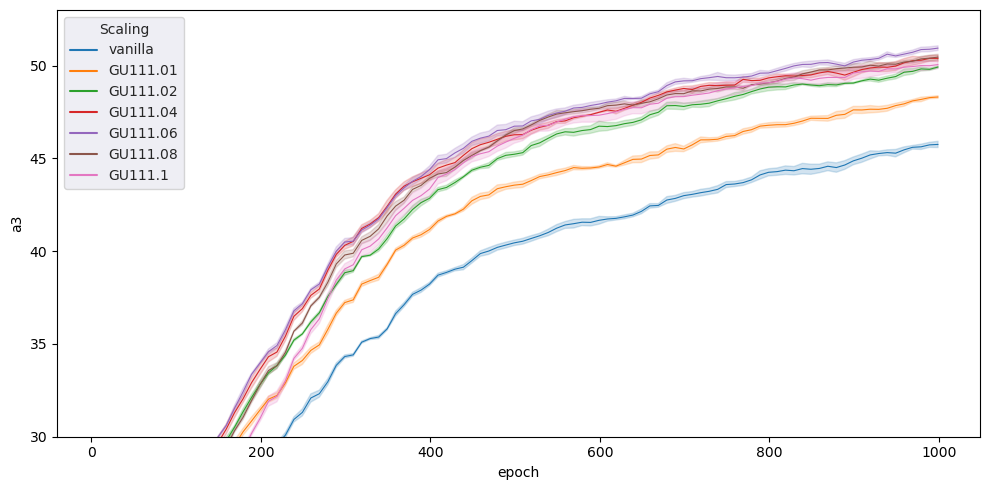

In [6]:
data_temp = load_data("../Output_GU/CIFAR100-*-N100-*/s[1-9].csv")

for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 1, figsize=(10,5), dpi=100, sharey=True)
    axes = [axes]
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        temp = temp[temp["epoch"] <= 999]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        replace_icon =   {"GU111.01": "1", 
                          "GU111.02": "2", 
                          "GU111.04": "4", 
                          "GU111.06": "6", 
                          "GU111.08": "8", 
                          "GU111.1": "10"}
        sk = ["vanilla"] + list(replace_icon.keys())
        temp = temp.set_index('Scaling').loc[sk].reset_index()
        ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Scaling", palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([30, 53])
        break
    fig.tight_layout()
    plt.pause(0.1)

### CIFAR100 - GU 121

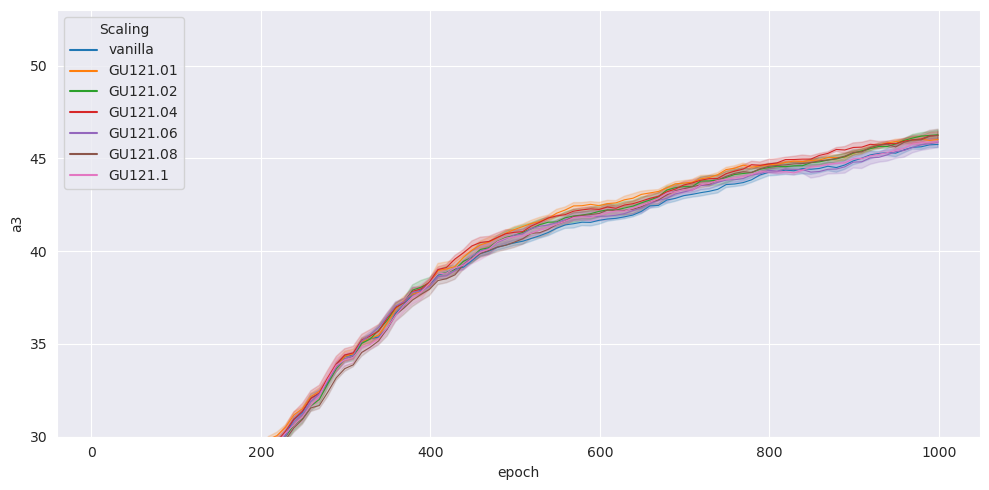

In [7]:
data_temp = load_data("../Output_GU/CIFAR100-*-N100-*/s[1-9].csv")

for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 1, figsize=(10,5), dpi=100, sharey=True)
    axes = [axes]
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        temp = temp[temp["epoch"] <= 999]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        replace_icon =   {"GU121.01": "1", 
                          "GU121.02": "2", 
                          "GU121.04": "4", 
                          "GU121.06": "6", 
                          "GU121.08": "8", 
                          "GU121.1": "10"}
        sk = ["vanilla"] + list(replace_icon.keys())
        temp = temp.set_index('Scaling').loc[sk].reset_index()
        ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Scaling", palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([30, 53])
        break
    fig.tight_layout()
    plt.pause(0.1)

### CIFAR100 - GGU 111

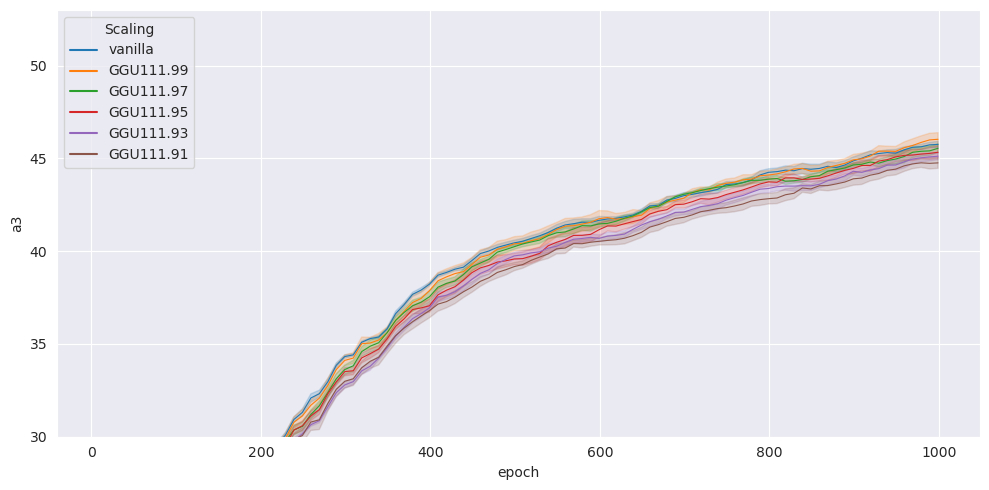

In [8]:
data_temp = load_data("../Output_GU/CIFAR100-*-N100-*/s[1-9].csv")

for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 1, figsize=(10,5), dpi=100, sharey=True)
    axes = [axes]
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        temp = temp[temp["epoch"] <= 999]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        replace_icon =   {"GGU111.99": "99", 
                          "GGU111.97": "97", 
                          "GGU111.95": "95", 
                          "GGU111.93": "93", 
                          "GGU111.91": "91", 
                         }
        sk = ["vanilla"] + list(replace_icon.keys())
        temp = temp.set_index('Scaling').loc[sk].reset_index()
        ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Scaling", palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([30, 53])
        break
    fig.tight_layout()
    plt.pause(0.1)

### C10, GGU 121 Line

KeyError: "['vanilla'] not in index"

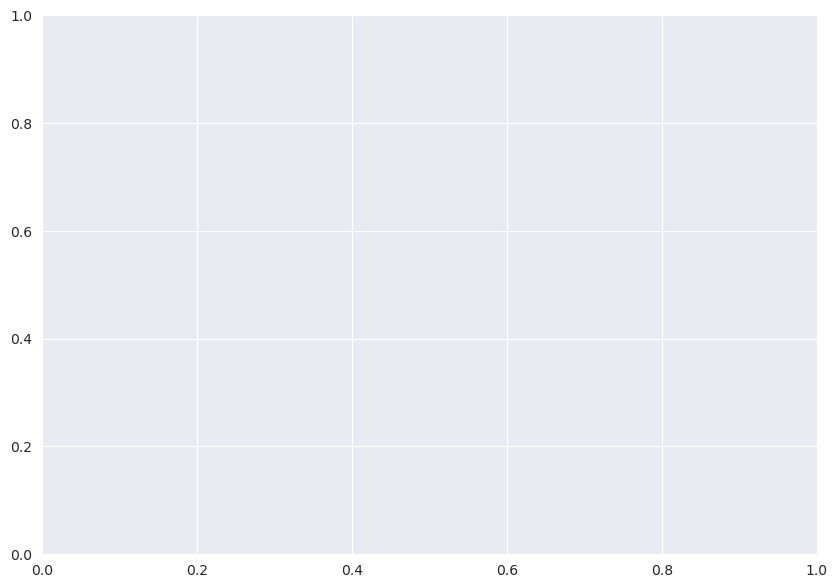

In [9]:
data_temp = load_data("../Output_GU/CIFAR10-*-N100-*/s[1-9].csv")

for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 1, figsize=(10,7), dpi=100, sharey=True)
    axes = [axes]
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        temp = temp[temp["epoch"] <= 999]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        replace_icon =   {"GGU121.01": "1", 
                          # "GGU121.03": "3", 
                          "GGU121.05": "5", 
                          # "GGU121.07": "7", 
                          "GGU121.09": "9"}
        sk = ["vanilla"] + list(replace_icon.keys())
        temp = temp.set_index('Scaling').loc[sk].reset_index()
        ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Scaling", palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([70, 83])
        break
    fig.tight_layout()
    plt.pause(0.1)

In [ ]:
### C10, GGU 121 Line

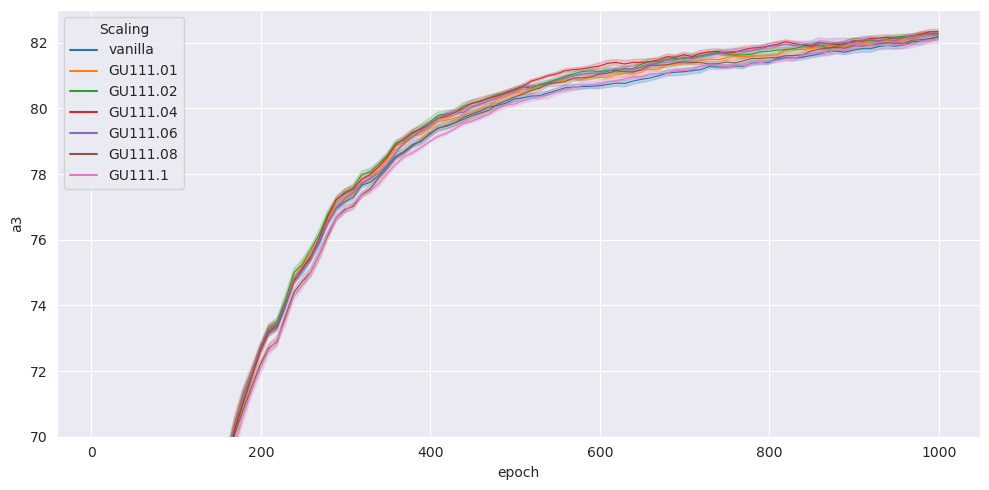

In [ ]:
data_temp = load_data("../Output_GU/CIFAR10-*-N100-*/s[1-9].csv")

for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 1, figsize=(10,5), dpi=100, sharey=True)
    axes = [axes]
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        temp = temp[temp["epoch"] <= 999]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        replace_icon =   {"GU111.01": "1", 
                          "GU111.02": "2", 
                          "GU111.04": "4", 
                          "GU111.06": "6", 
                          "GU111.08": "8", 
                          "GU111.1": "10"}
        sk = ["vanilla"] + list(replace_icon.keys())
        temp = temp.set_index('Scaling').loc[sk].reset_index()
        ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Scaling", palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([70, 83])
        break
    fig.tight_layout()
    plt.pause(0.1)

## BarPlot

### CIFAR100, All

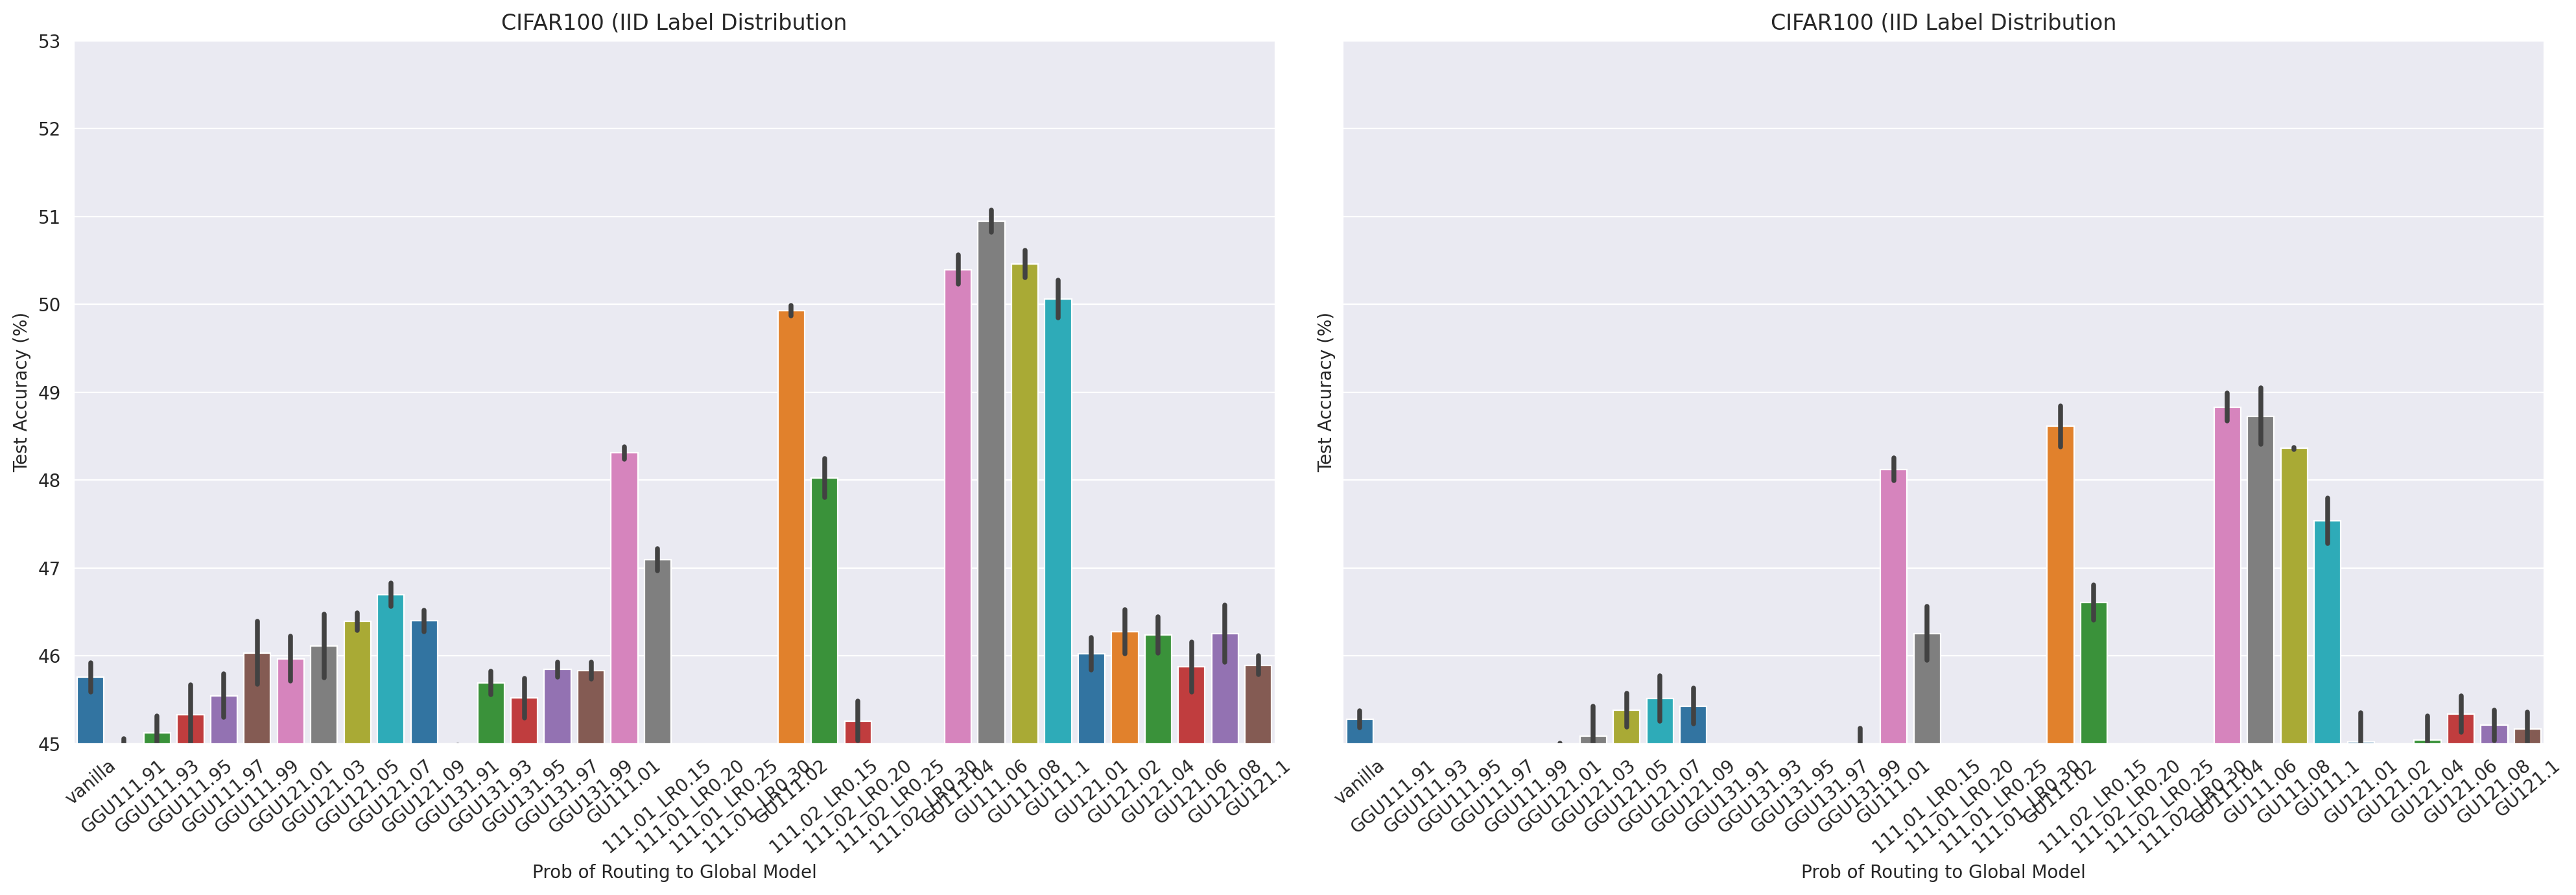

In [10]:
# data_temp = load_data("../Output/CIFAR100-*-N100-P0.01*/s[1-9].csv")
data_temp = load_data("../Output_GU/CIFAR100-*-N100-*/s[1-9].csv")
# data_temp = pd.concat([data_temp, data_temp3])

for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        # temp = temp[temp["epoch"] <= 999]
        temp = temp[temp["epoch"] == 999]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        
        ax = sns.barplot(data=temp, x="Scaling", y="a3", ax=ax, palette="tab10", errorbar="se", linewidth = 0.8)
        # ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Scaling", palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([45, 53])
        ax.set_ylabel("Test Accuracy (%)")
        ax.set_xlabel("Prob of Routing to Global Model")
        ax.set_title("CIFAR100 (IID Label Distribution")
        # ax.set_xlabel("# communications")
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
        # break
    fig.tight_layout()
    plt.pause(0.1)

### CIFAR100, GU111

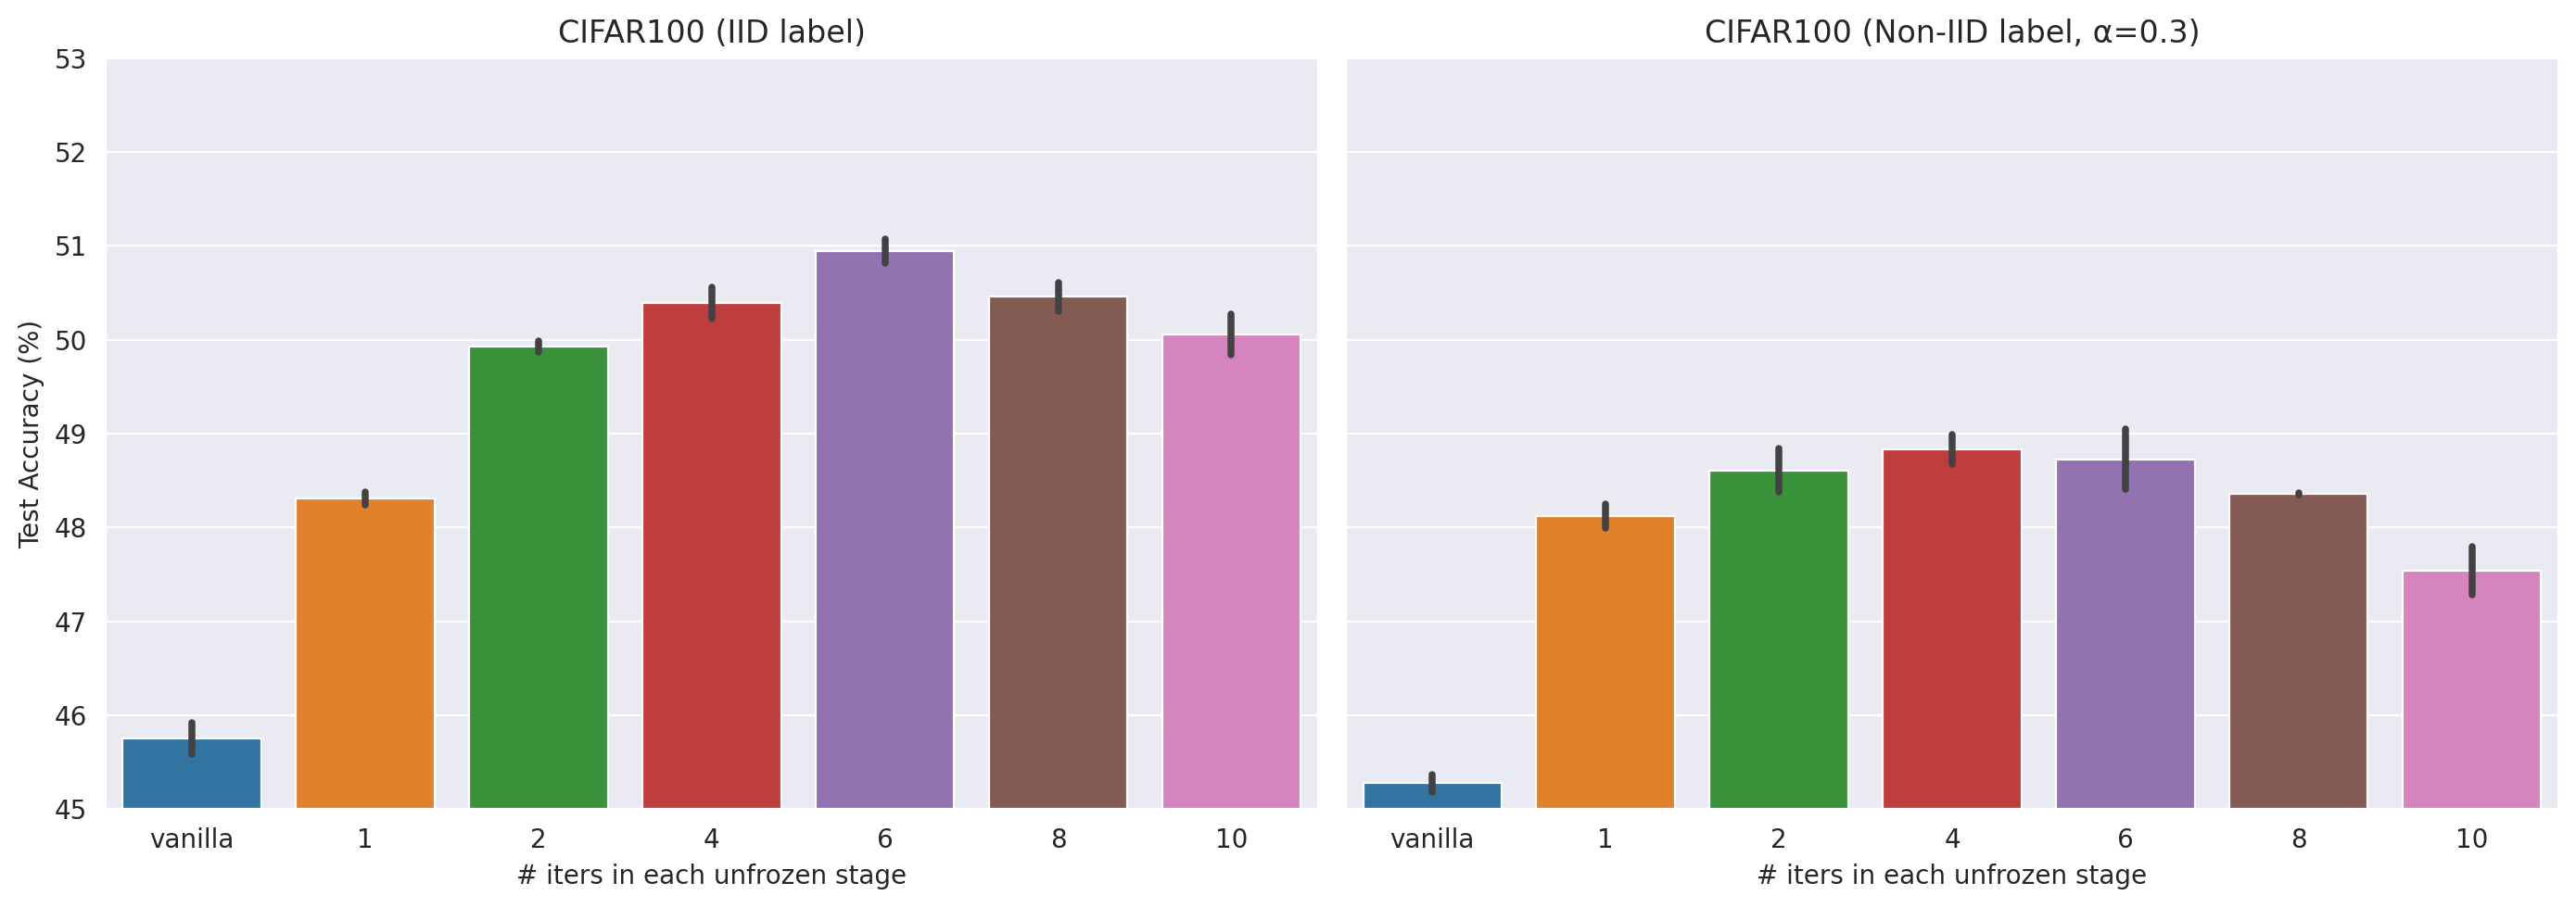

In [11]:
data_temp = load_data("../Output_GU/CIFAR100-*-N100-*/s[1-9].csv")

for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(14,5), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        # temp = temp[temp["epoch"] <= 999]
        temp = temp[temp["epoch"] == 999]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        
        replace_icon =   {"GU111.01": "1", 
                          "GU111.02": "2", 
                          "GU111.04": "4", 
                          "GU111.06": "6", 
                          "GU111.08": "8", 
                          "GU111.1": "10"}
        
        sk = ["vanilla"] + list(replace_icon.keys())
        temp = temp.set_index('Scaling').loc[sk].reset_index()
        
        temp = temp.replace({"Scaling": replace_icon})
        
        ax = sns.barplot(data=temp, x="Scaling", y="a3", ax=ax, palette="tab10", errorbar="se", linewidth = 0.8)
        # ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Scaling", palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([45, 53])
        ax.set_xlabel("# iters in each unfrozen stage")
        
    
    axes[0].set_ylabel("Test Accuracy (%)")
    axes[1].set_ylabel("")
    
    axes[0].set_title("CIFAR100 (IID label)")
    axes[1].set_title("CIFAR100 (Non-IID label, α=0.3)")
    
    fig.tight_layout()
    plt.pause(0.1)

### CIFAR100, GU121

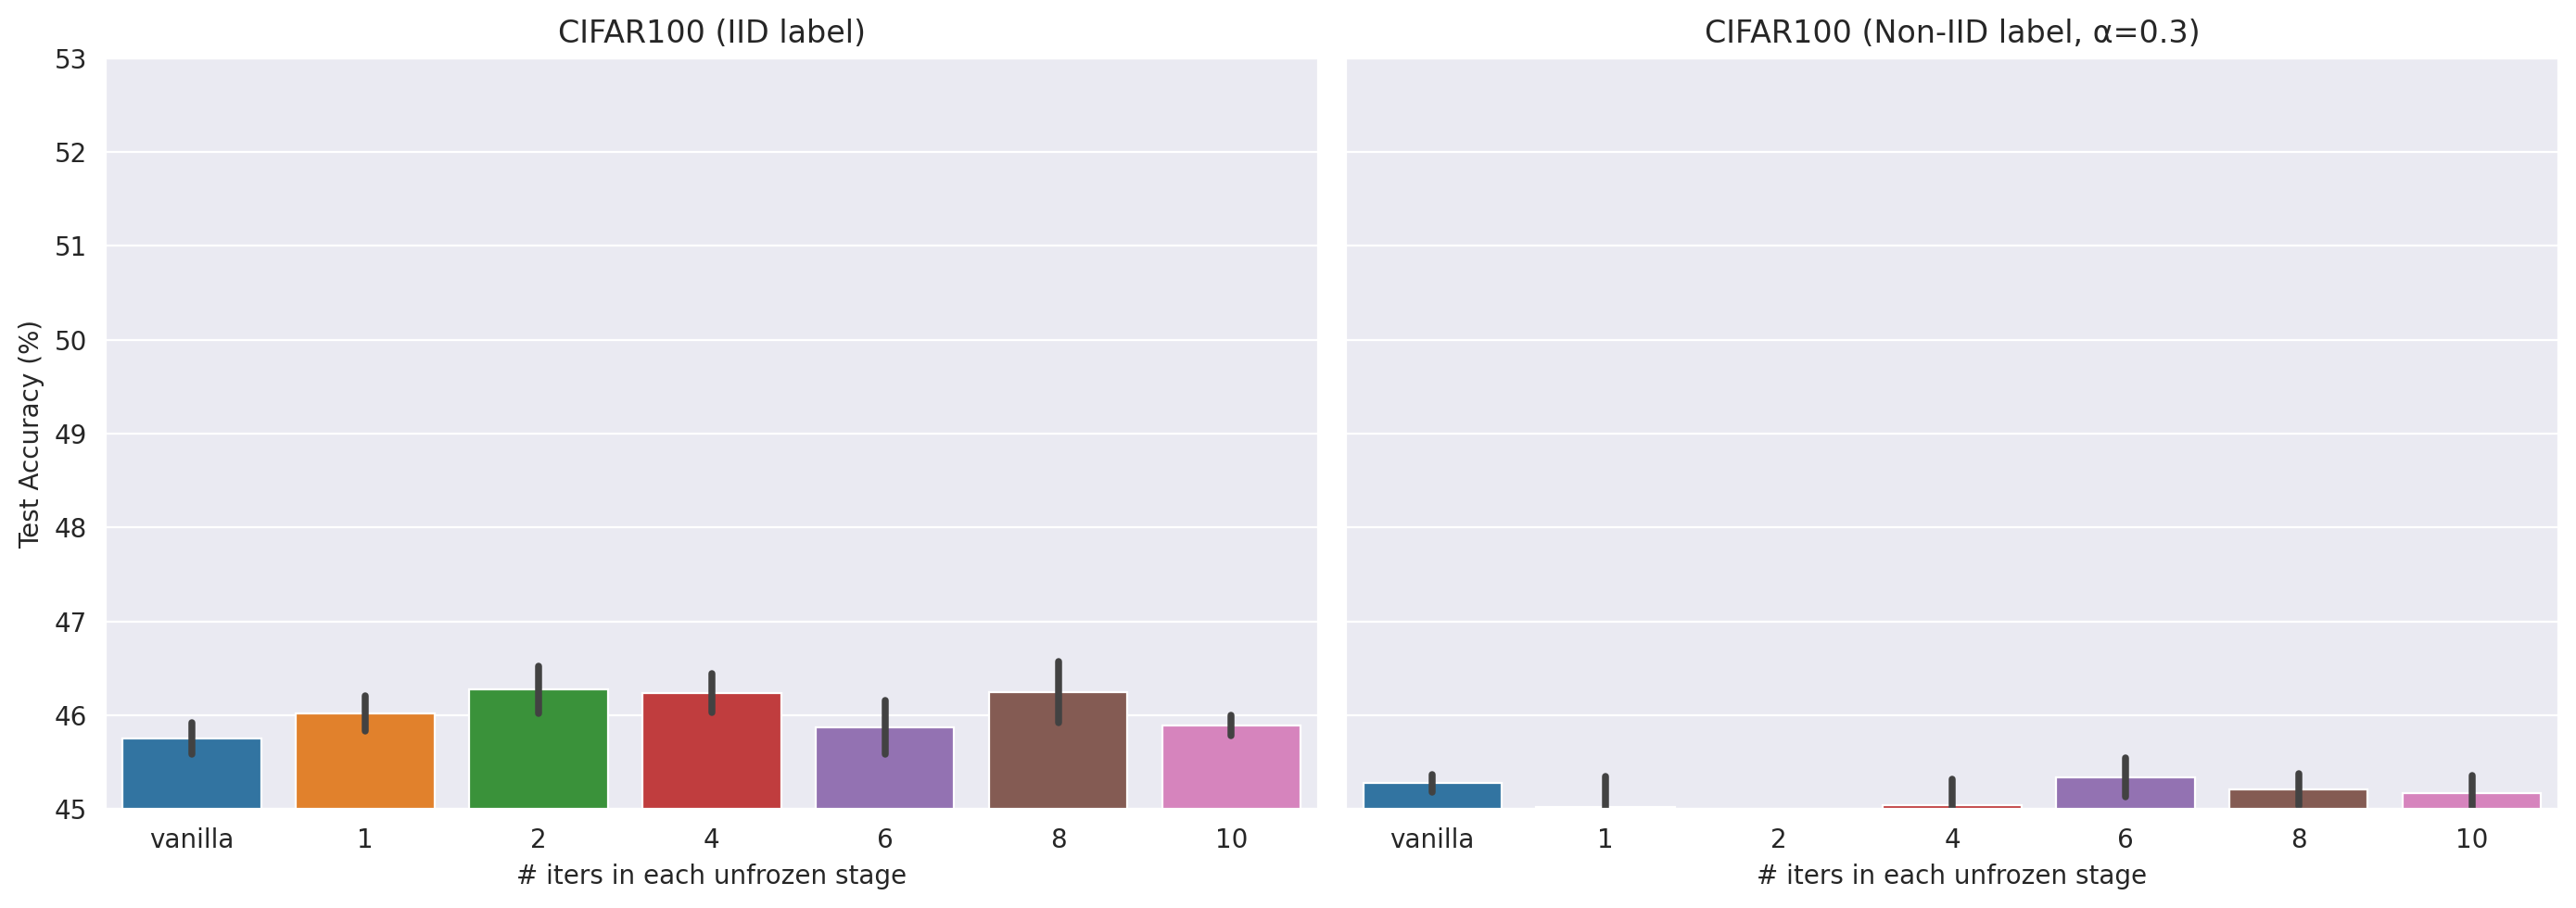

In [12]:
data_temp = load_data("../Output_GU/CIFAR100-*-N100-*/s[1-9].csv")

for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(14,5), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        # temp = temp[temp["epoch"] <= 999]
        temp = temp[temp["epoch"] == 999]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        
        replace_icon =   {"GU121.01": "1", 
                          "GU121.02": "2", 
                          "GU121.04": "4", 
                          "GU121.06": "6", 
                          "GU121.08": "8", 
                          "GU121.1": "10"}
        
        sk = ["vanilla"] + list(replace_icon.keys())
        temp = temp.set_index('Scaling').loc[sk].reset_index()
        
        temp = temp.replace({"Scaling": replace_icon})
        
        ax = sns.barplot(data=temp, x="Scaling", y="a3", ax=ax, palette="tab10", errorbar="se", linewidth = 0.8)
        # ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Scaling", palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([45, 53])
        ax.set_xlabel("# iters in each unfrozen stage")
        
    
    axes[0].set_ylabel("Test Accuracy (%)")
    axes[1].set_ylabel("")
    
    axes[0].set_title("CIFAR100 (IID label)")
    axes[1].set_title("CIFAR100 (Non-IID label, α=0.3)")
    
    fig.tight_layout()
    plt.pause(0.1)

### C100, GGU 111

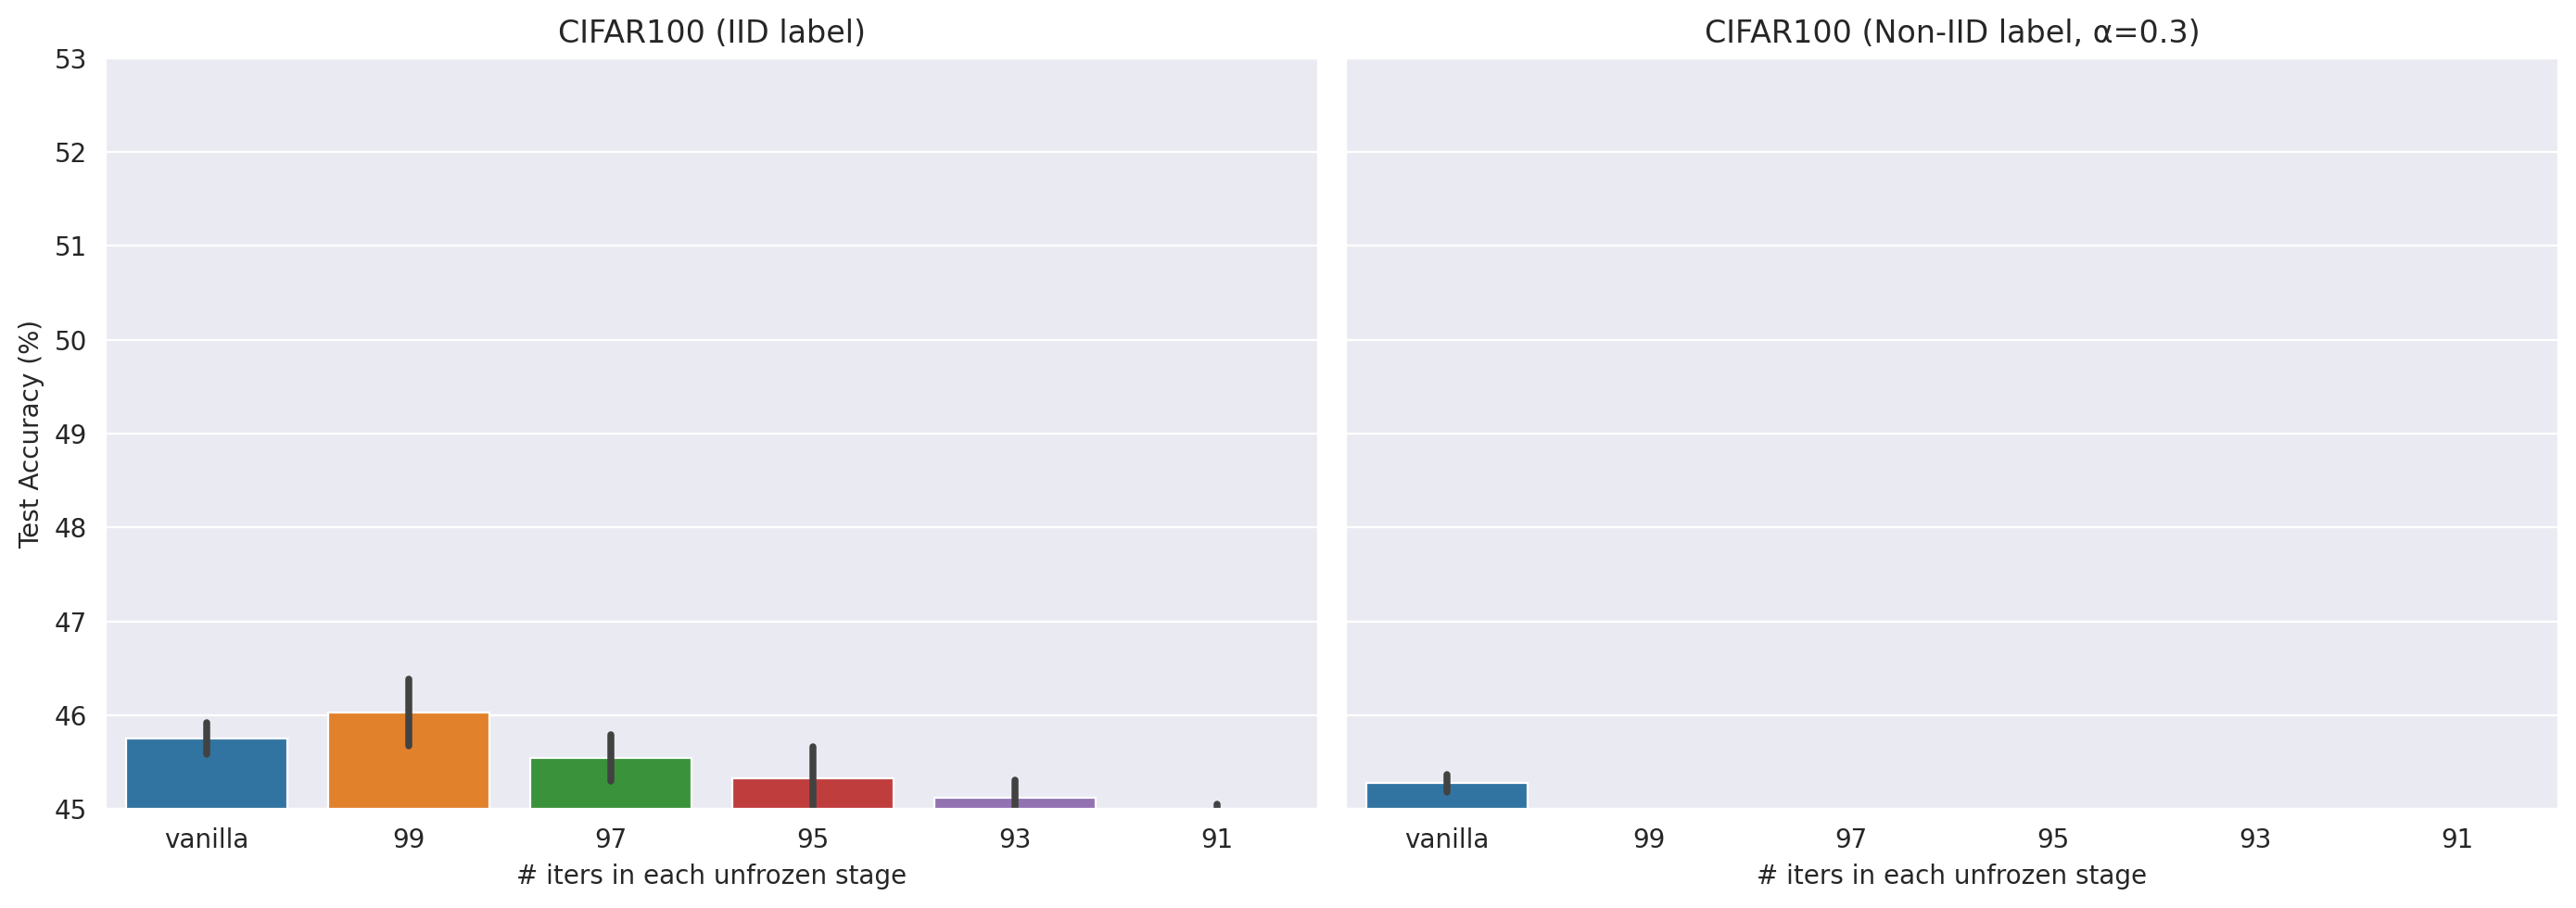

In [13]:
data_temp = load_data("../Output_GU/CIFAR100-*-N100-*/s[1-9].csv")

for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(14,5), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        # temp = temp[temp["epoch"] <= 999]
        temp = temp[temp["epoch"] == 999]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        
        replace_icon =   {"GGU111.99": "99", 
                          "GGU111.97": "97", 
                          "GGU111.95": "95", 
                          "GGU111.93": "93", 
                          "GGU111.91": "91", 
                          }
        
        sk = ["vanilla"] + list(replace_icon.keys())
        temp = temp.set_index('Scaling').loc[sk].reset_index()
        
        temp = temp.replace({"Scaling": replace_icon})
        
        ax = sns.barplot(data=temp, x="Scaling", y="a3", ax=ax, palette="tab10", errorbar="se", linewidth = 0.8)
        # ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Scaling", palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([45, 53])
        ax.set_xlabel("# iters in each unfrozen stage")
        
    
    axes[0].set_ylabel("Test Accuracy (%)")
    axes[1].set_ylabel("")
    
    axes[0].set_title("CIFAR100 (IID label)")
    axes[1].set_title("CIFAR100 (Non-IID label, α=0.3)")
    
    fig.tight_layout()
    plt.pause(0.1)

### C100, GGU 121

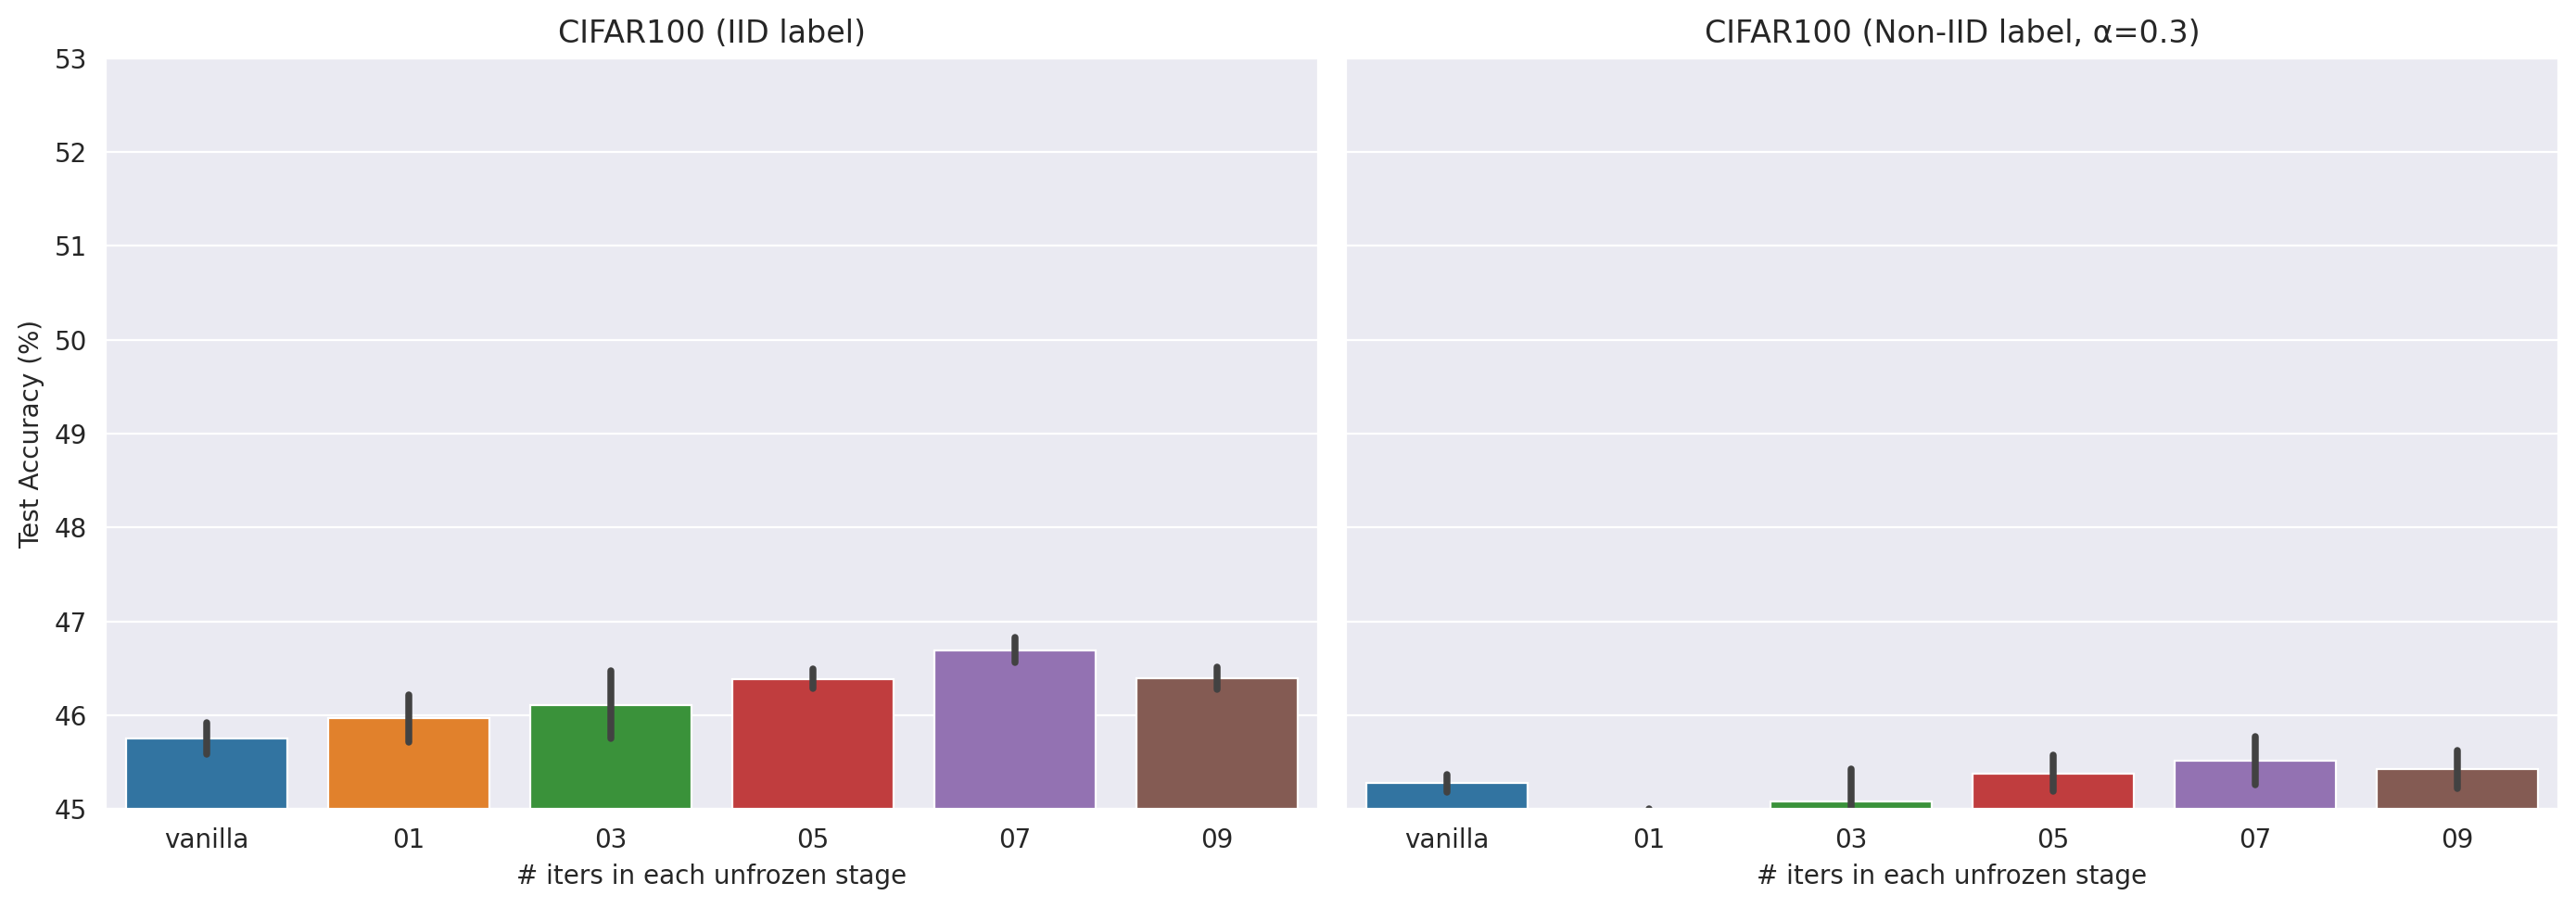

In [14]:
data_temp = load_data("../Output_GU/CIFAR100-*-N100-*/s[1-9].csv")

for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(14,5), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        # temp = temp[temp["epoch"] <= 999]
        temp = temp[temp["epoch"] == 999]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        
        replace_icon =   {"GGU121.01": "01", 
                          "GGU121.03": "03", 
                          "GGU121.05": "05", 
                          "GGU121.07": "07", 
                          "GGU121.09": "09", 
                          }
        
        sk = ["vanilla"] + list(replace_icon.keys())
        temp = temp.set_index('Scaling').loc[sk].reset_index()
        
        temp = temp.replace({"Scaling": replace_icon})
        
        ax = sns.barplot(data=temp, x="Scaling", y="a3", ax=ax, palette="tab10", errorbar="se", linewidth = 0.8)
        # ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Scaling", palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([45, 53])
        ax.set_xlabel("# iters in each unfrozen stage")
        
    
    axes[0].set_ylabel("Test Accuracy (%)")
    axes[1].set_ylabel("")
    
    axes[0].set_title("CIFAR100 (IID label)")
    axes[1].set_title("CIFAR100 (Non-IID label, α=0.3)")
    
    fig.tight_layout()
    plt.pause(0.1)

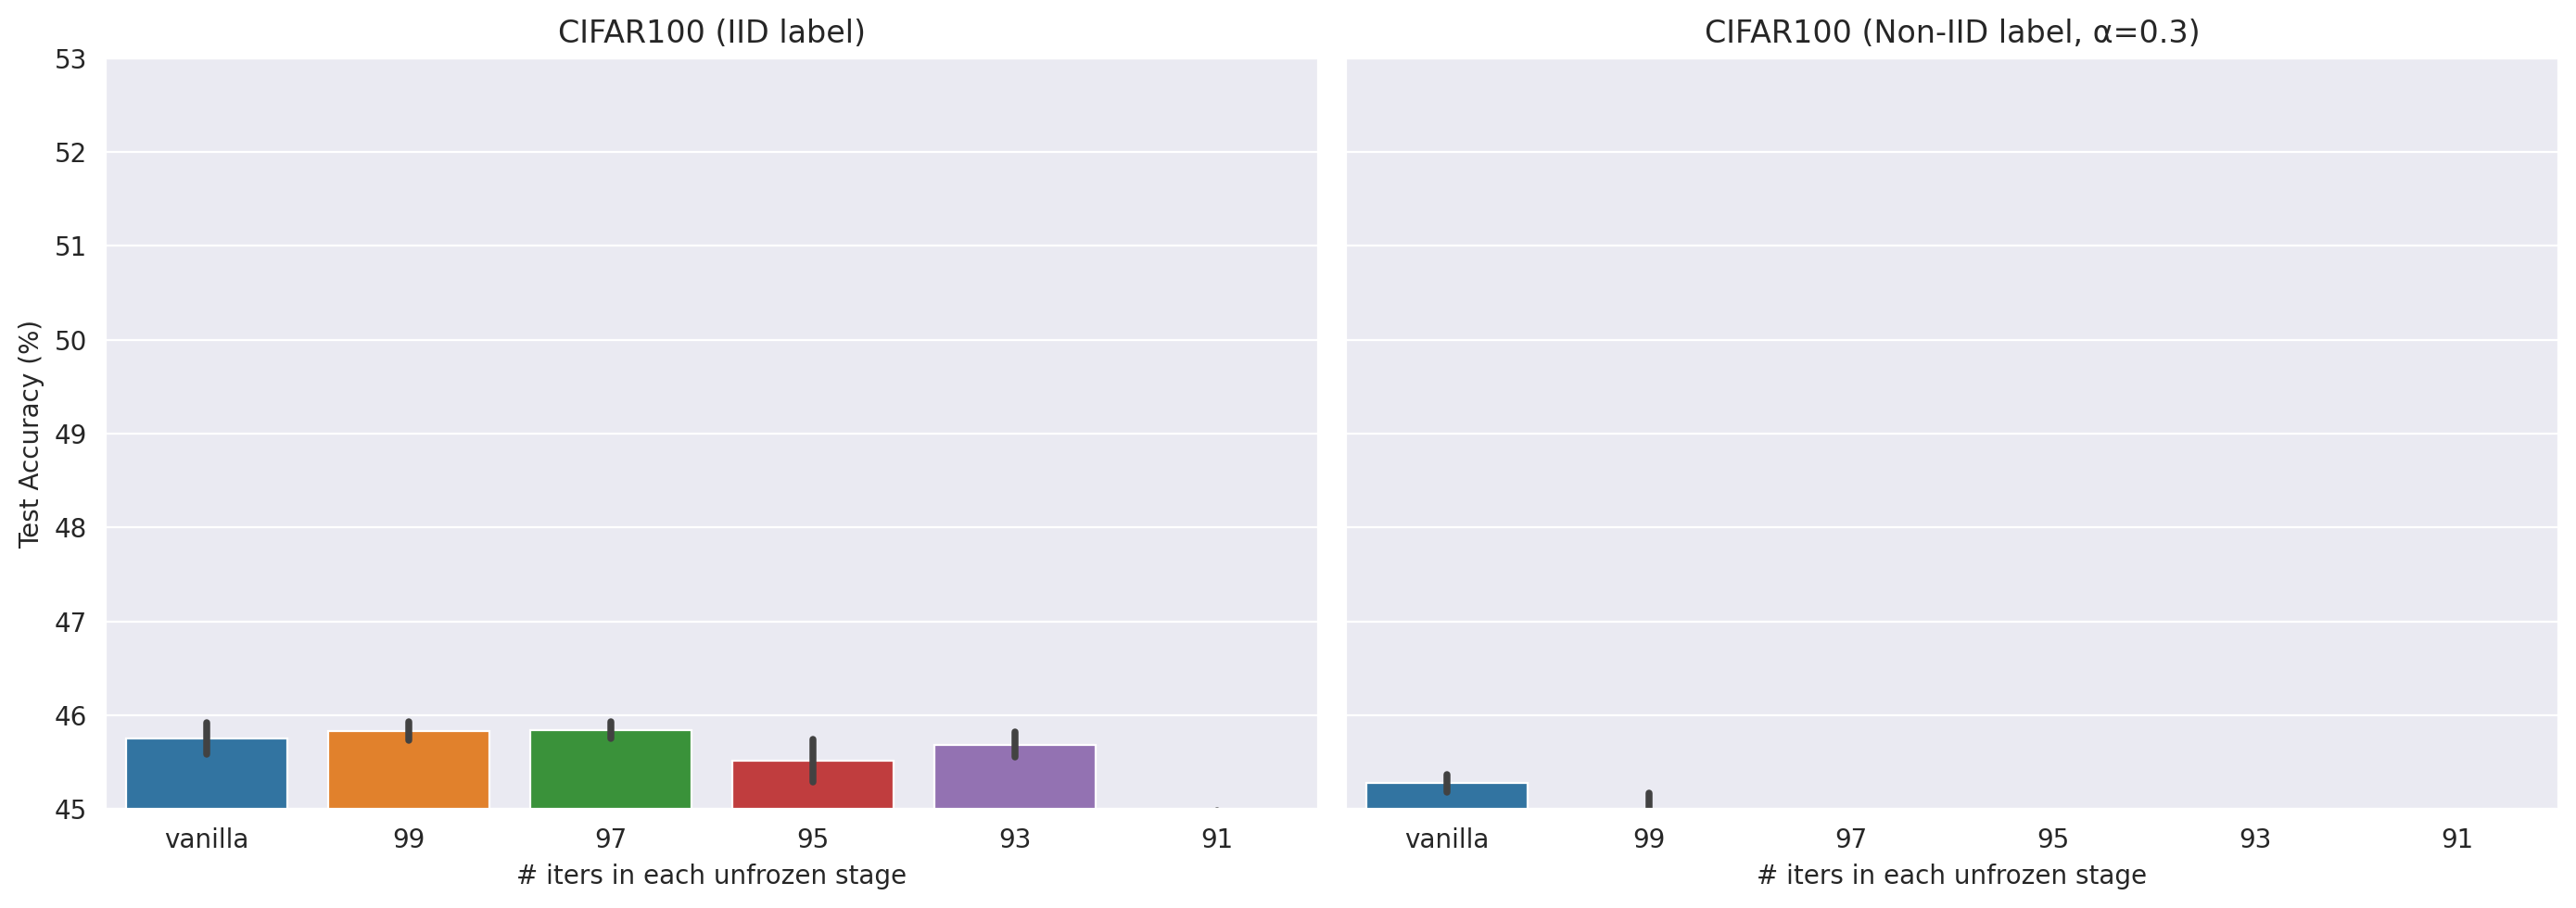

In [15]:
data_temp = load_data("../Output_GU/CIFAR100-*-N100-*/s[1-9].csv")

for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(14,5), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        # temp = temp[temp["epoch"] <= 999]
        temp = temp[temp["epoch"] == 999]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        
        replace_icon =   {"GGU131.99": "99", 
                          "GGU131.97": "97", 
                          "GGU131.95": "95", 
                          "GGU131.93": "93", 
                          "GGU131.91": "91", 
                          }
        
        sk = ["vanilla"] + list(replace_icon.keys())
        temp = temp.set_index('Scaling').loc[sk].reset_index()
        
        temp = temp.replace({"Scaling": replace_icon})
        
        ax = sns.barplot(data=temp, x="Scaling", y="a3", ax=ax, palette="tab10", errorbar="se", linewidth = 0.8)
        # ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Scaling", palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([45, 53])
        ax.set_xlabel("# iters in each unfrozen stage")
        
    
    axes[0].set_ylabel("Test Accuracy (%)")
    axes[1].set_ylabel("")
    
    axes[0].set_title("CIFAR100 (IID label)")
    axes[1].set_title("CIFAR100 (Non-IID label, α=0.3)")
    
    fig.tight_layout()
    plt.pause(0.1)

## C10, All

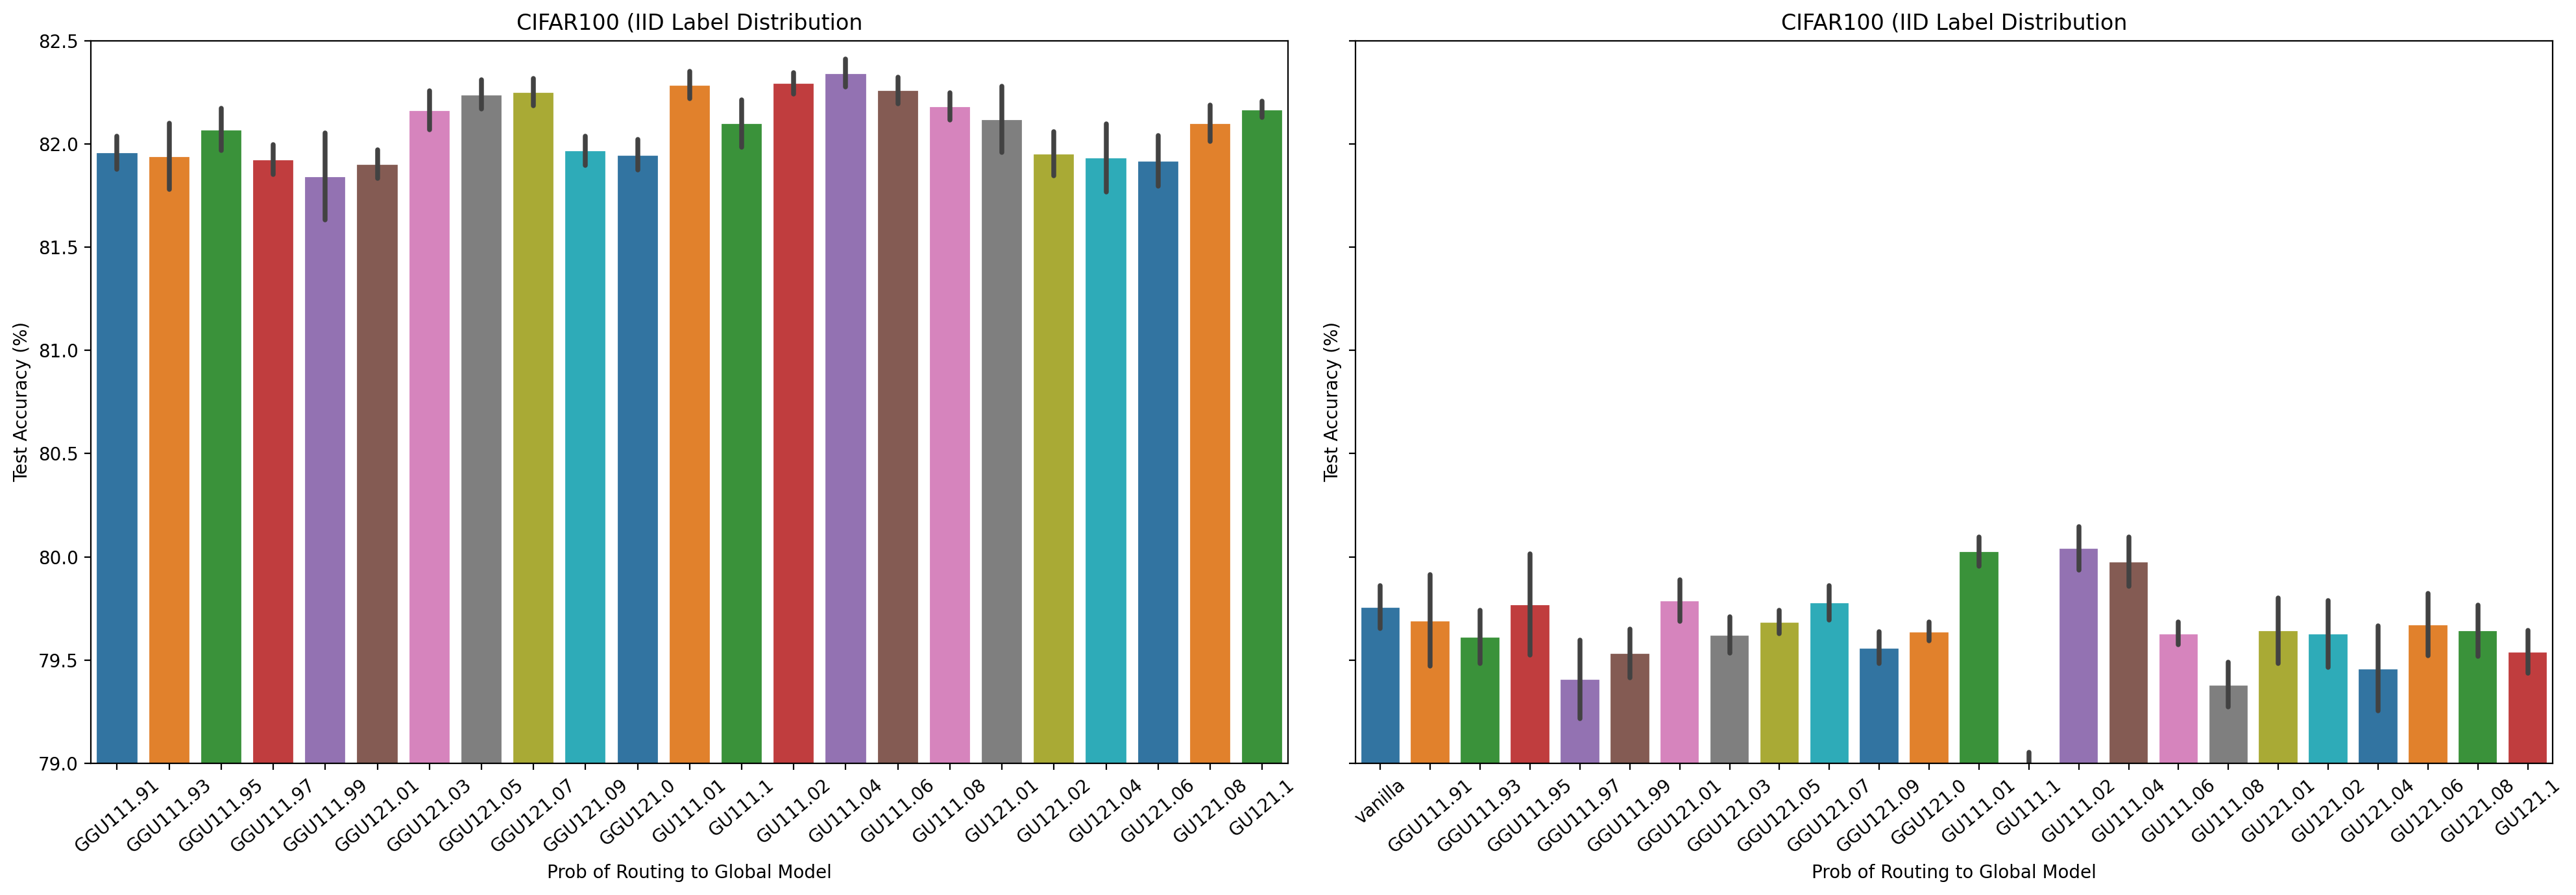

In [4]:
data_temp = load_data("../Output_GU/CIFAR10-*-N100-P0.01*/s[1-9].csv")

for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        # temp = temp[temp["epoch"] <= 999]
        temp = temp[temp["epoch"] == 999]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        
        ax = sns.barplot(data=temp, x="Scaling", y="a3", ax=ax, palette="tab10", errorbar="se", linewidth = 0.8)
        # ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Scaling", palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([79, 82.5])
        ax.set_ylabel("Test Accuracy (%)")
        ax.set_xlabel("Prob of Routing to Global Model")
        ax.set_title("CIFAR100 (IID Label Distribution")
        # ax.set_xlabel("# communications")
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
        # break
    fig.tight_layout()
    plt.pause(0.1)

### CIFAR10, GU111

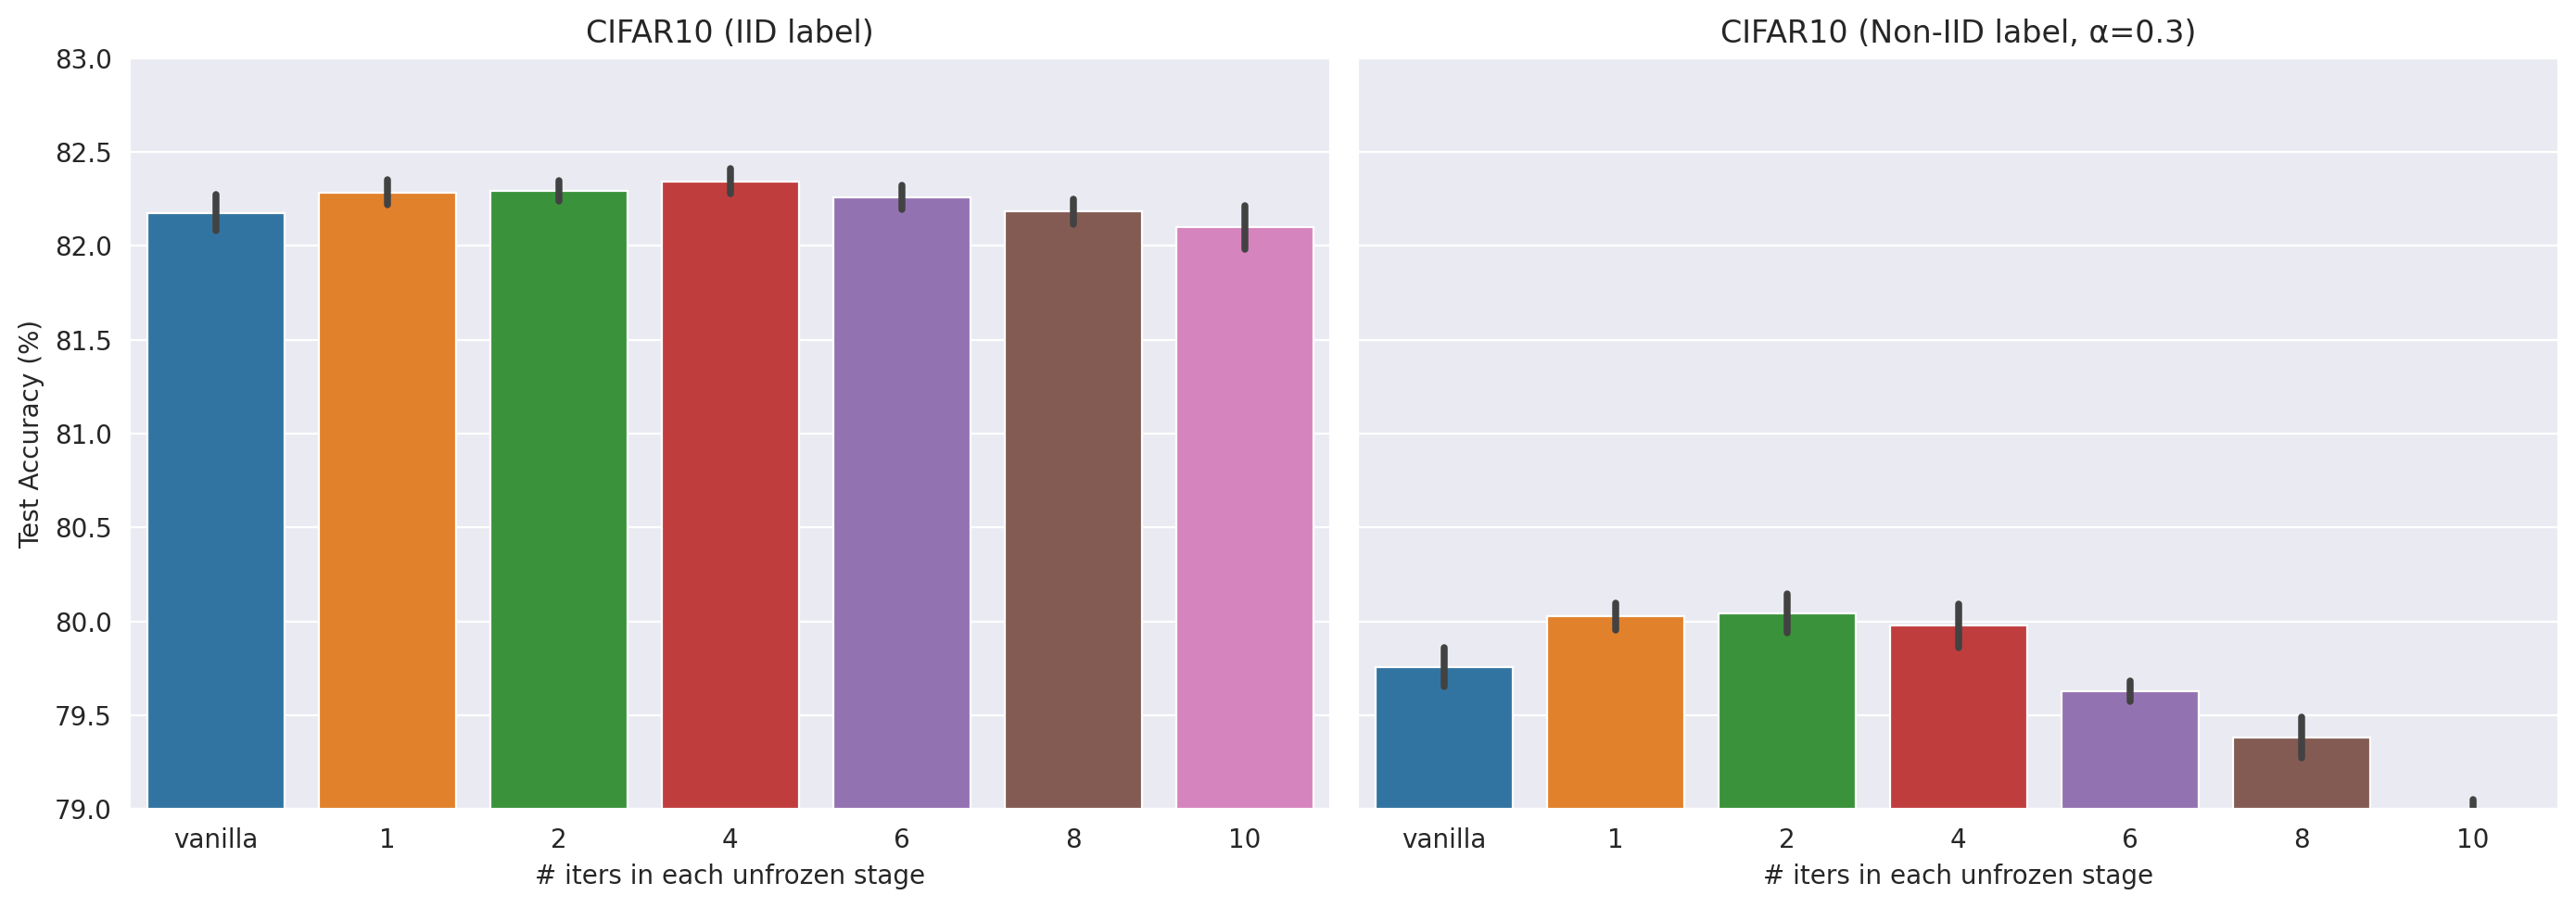

In [63]:
data_temp = load_data("../Output_GU/CIFAR10-*-N100-*/s[1-9].csv")

for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(14,5), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        # temp = temp[temp["epoch"] <= 999]
        temp = temp[temp["epoch"] == 999]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        
        replace_icon =   {
                          "GU111.01": "1", 
                          "GU111.02": "2", 
                          "GU111.04": "4", 
                          "GU111.06": "6", 
                          "GU111.08": "8", 
                          "GU111.1": "10"}
        
        sk = ["vanilla"] + list(replace_icon.keys())
        temp = temp.set_index('Scaling').loc[sk].reset_index()
        
        temp = temp.replace({"Scaling": replace_icon})
        
        ax = sns.barplot(data=temp, x="Scaling", y="a3", ax=ax, palette="tab10", errorbar="se", linewidth = 0.8)
        # ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Scaling", palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([79, 83])
        ax.set_xlabel("# iters in each unfrozen stage")
        
    
    axes[0].set_ylabel("Test Accuracy (%)")
    axes[1].set_ylabel("")
    
    axes[0].set_title("CIFAR10 (IID label)")
    axes[1].set_title("CIFAR10 (Non-IID label, α=0.3)")

    fig.tight_layout()
    plt.pause(0.1)

### CIFAR10, GU121

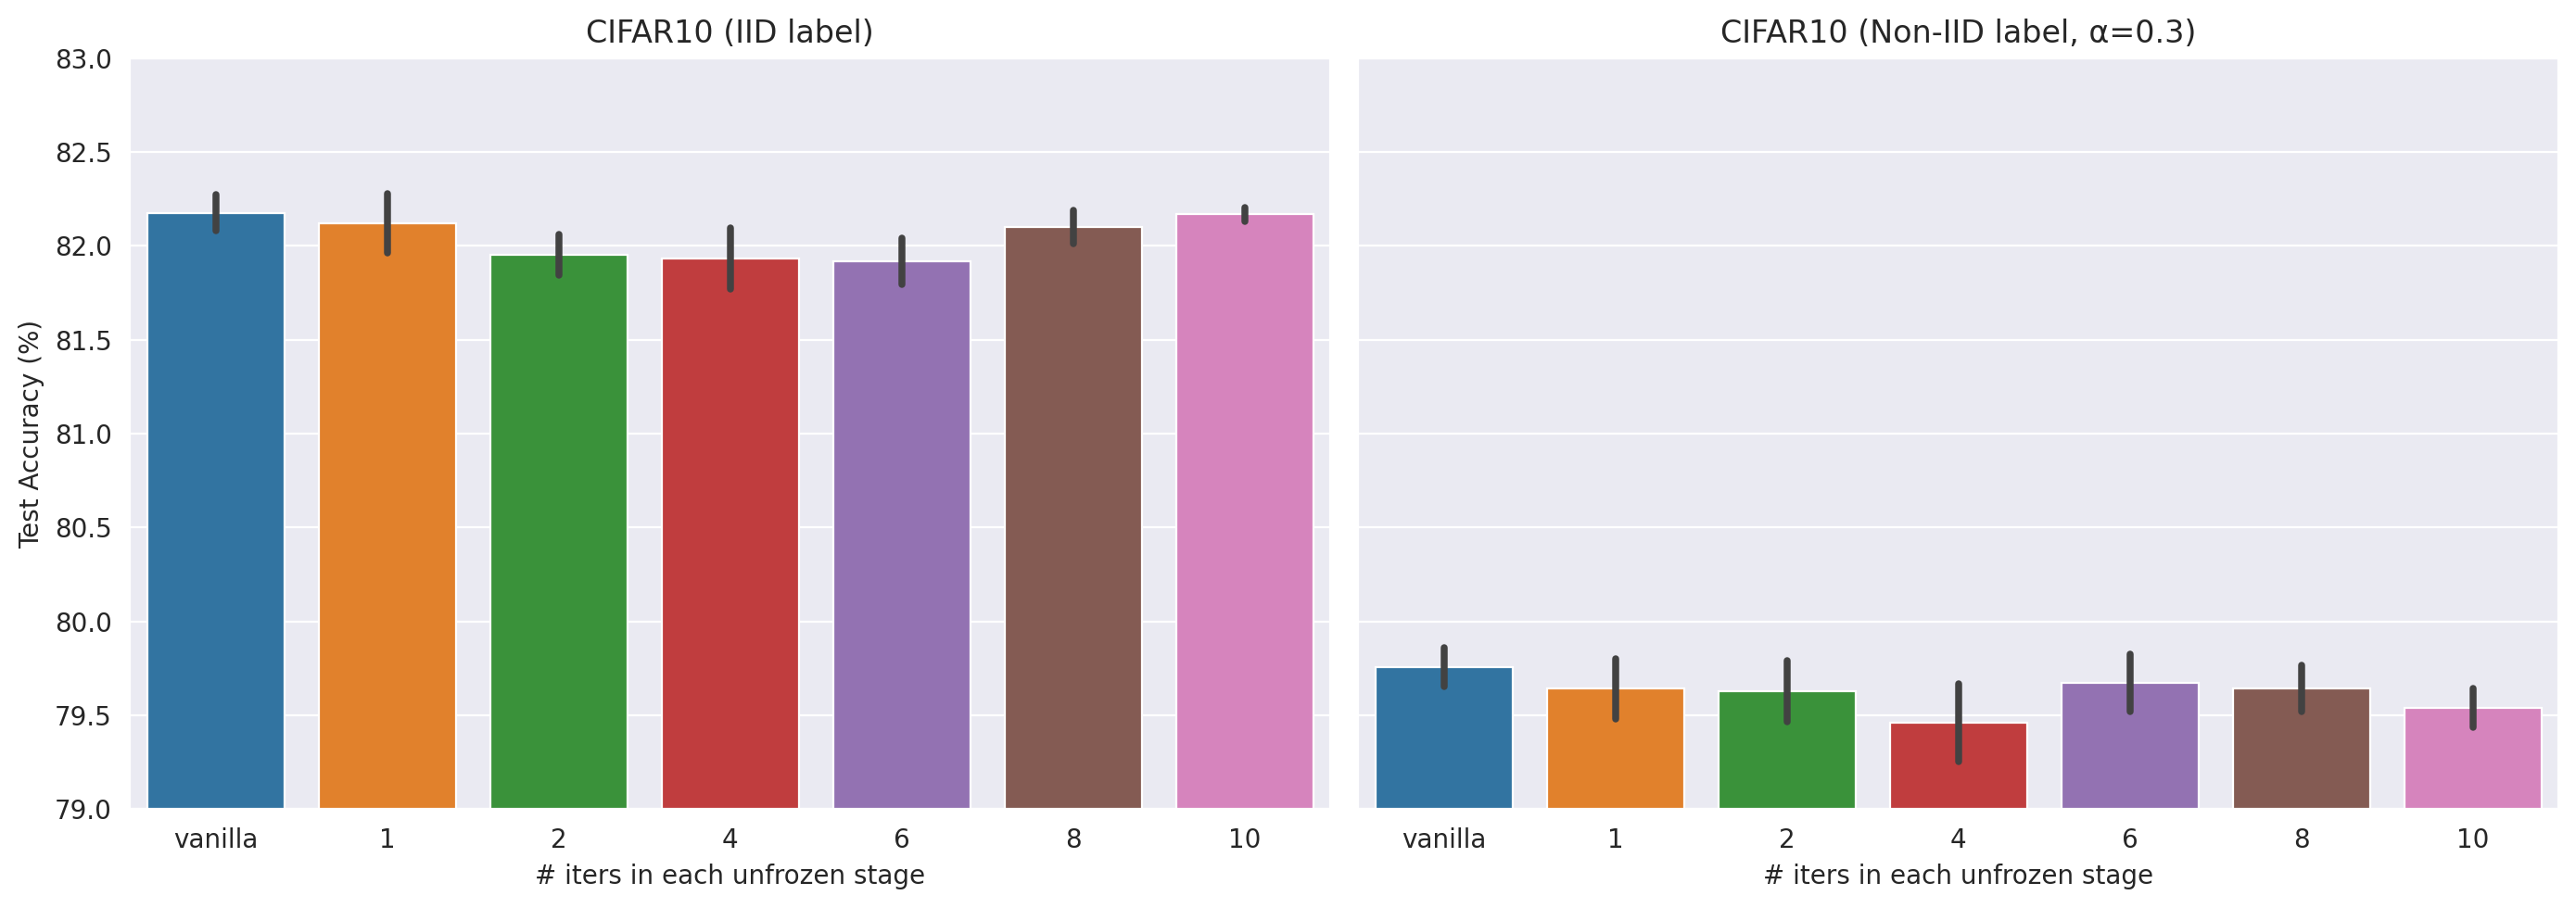

In [ ]:
data_temp = load_data("../Output_GU/CIFAR10-*-N100-*/s[1-9].csv")

for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(14,5), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        # temp = temp[temp["epoch"] <= 999]
        temp = temp[temp["epoch"] == 999]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        
        replace_icon =   {"GU121.01": "1", 
                          "GU121.02": "2", 
                          "GU121.04": "4", 
                          "GU121.06": "6", 
                          "GU121.08": "8", 
                          "GU121.1": "10"}
        
        sk = ["vanilla"] + list(replace_icon.keys())
        temp = temp.set_index('Scaling').loc[sk].reset_index()
        
        temp = temp.replace({"Scaling": replace_icon})
        
        ax = sns.barplot(data=temp, x="Scaling", y="a3", ax=ax, palette="tab10", errorbar="se", linewidth = 0.8)
        # ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Scaling", palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([79, 83])
        ax.set_xlabel("# iters in each unfrozen stage")
        
    
    axes[0].set_ylabel("Test Accuracy (%)")
    axes[1].set_ylabel("")
    
    axes[0].set_title("CIFAR10 (IID label)")
    axes[1].set_title("CIFAR10 (Non-IID label, α=0.3)")
    
    fig.tight_layout()
    plt.pause(0.1)

### C10, GGU111

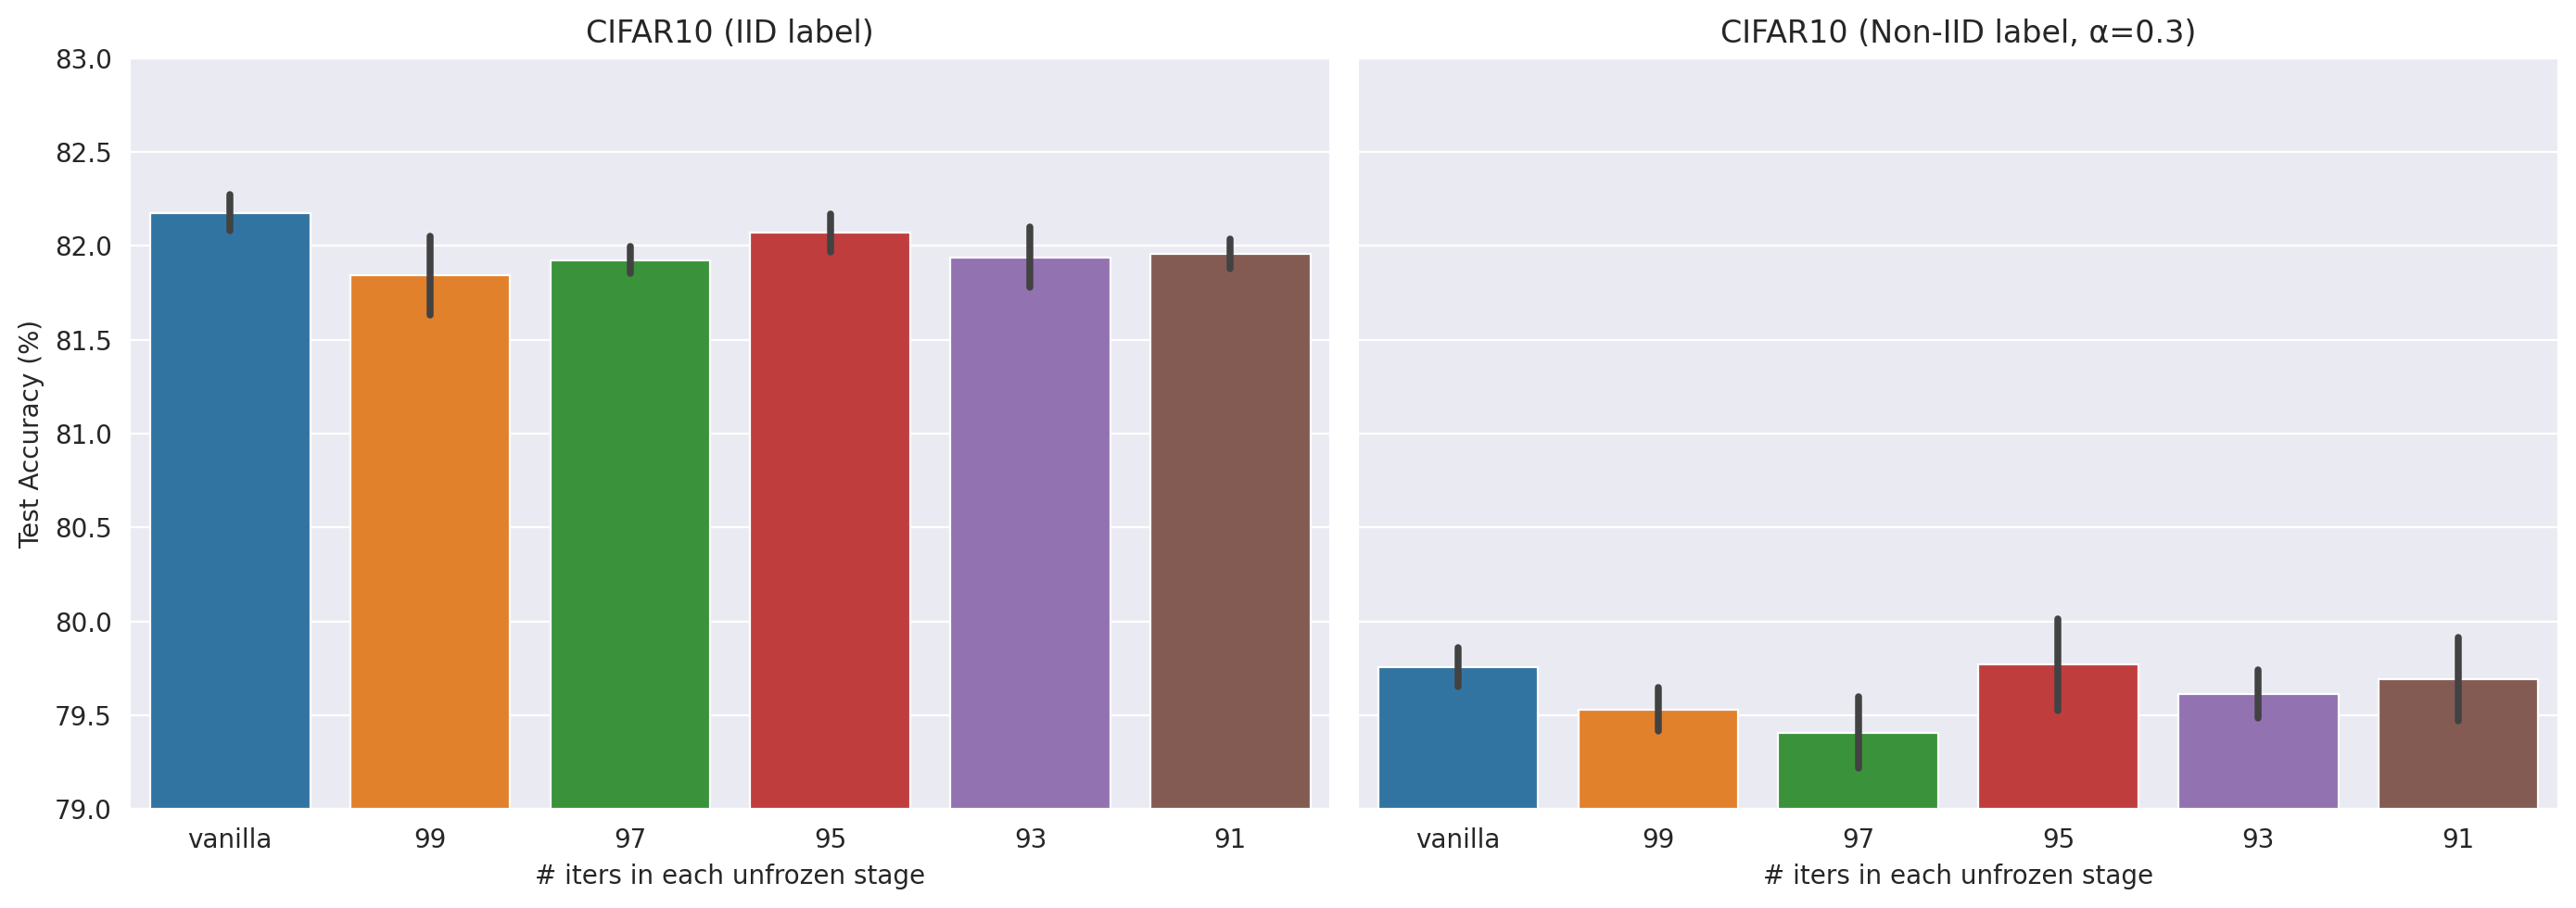

In [ ]:
data_temp = load_data("../Output_GU/CIFAR10-*-N100-*/s[1-9].csv")

# data_temp2 = load_data("../Output/CIFAR10noBN2-*-N100-*/s[1-9].csv")
# data_temp3 = load_data("../Output_GU/CIFAR10-*-N100-*/s[1-9].csv")
# data_temp = pd.concat([data_temp2, data_temp3])

for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(14,5), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        # temp = temp[temp["epoch"] <= 999]
        temp = temp[temp["epoch"] == 999]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        
        replace_icon =   {"GGU111.99": "99", 
                          "GGU111.97": "97", 
                          "GGU111.95": "95", 
                          "GGU111.93": "93", 
                          "GGU111.91": "91", 
                          }
        
        sk = ["vanilla"] + list(replace_icon.keys())
        temp = temp.set_index('Scaling').loc[sk].reset_index()
        
        temp = temp.replace({"Scaling": replace_icon})
        
        ax = sns.barplot(data=temp, x="Scaling", y="a3", ax=ax, palette="tab10", errorbar="se", linewidth = 0.8)
        # ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Scaling", palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([79, 83])
        ax.set_xlabel("# iters in each unfrozen stage")
        
    
    axes[0].set_ylabel("Test Accuracy (%)")
    axes[1].set_ylabel("")
    
    axes[0].set_title("CIFAR10 (IID label)")
    axes[1].set_title("CIFAR10 (Non-IID label, α=0.3)")
    
    fig.tight_layout()
    plt.pause(0.1)

### C10, GGU121

In [12]:
data_temp = load_data("../Output_GU/CIFAR10-*-N100-*/s[1-9].csv")
data_temp["Scaling"].unique()

array(['GGU111.91', 'GGU111.93', 'GGU111.95', 'GGU111.97', 'GGU111.99',
       'GGU121.01', 'GGU121.03', 'GGU121.05', 'GGU121.07', 'GGU121.09',
       'GGU121.0', 'GU111.01', 'GU111.1', 'GU111.02', 'GU111.04',
       'GU111.06', 'GU111.08', 'GU121.01', 'GU121.02', 'GU121.04',
       'GU121.06', 'GU121.08', 'GU121.1', 'vanilla'], dtype=object)

KeyError: "['vanilla'] not in index"

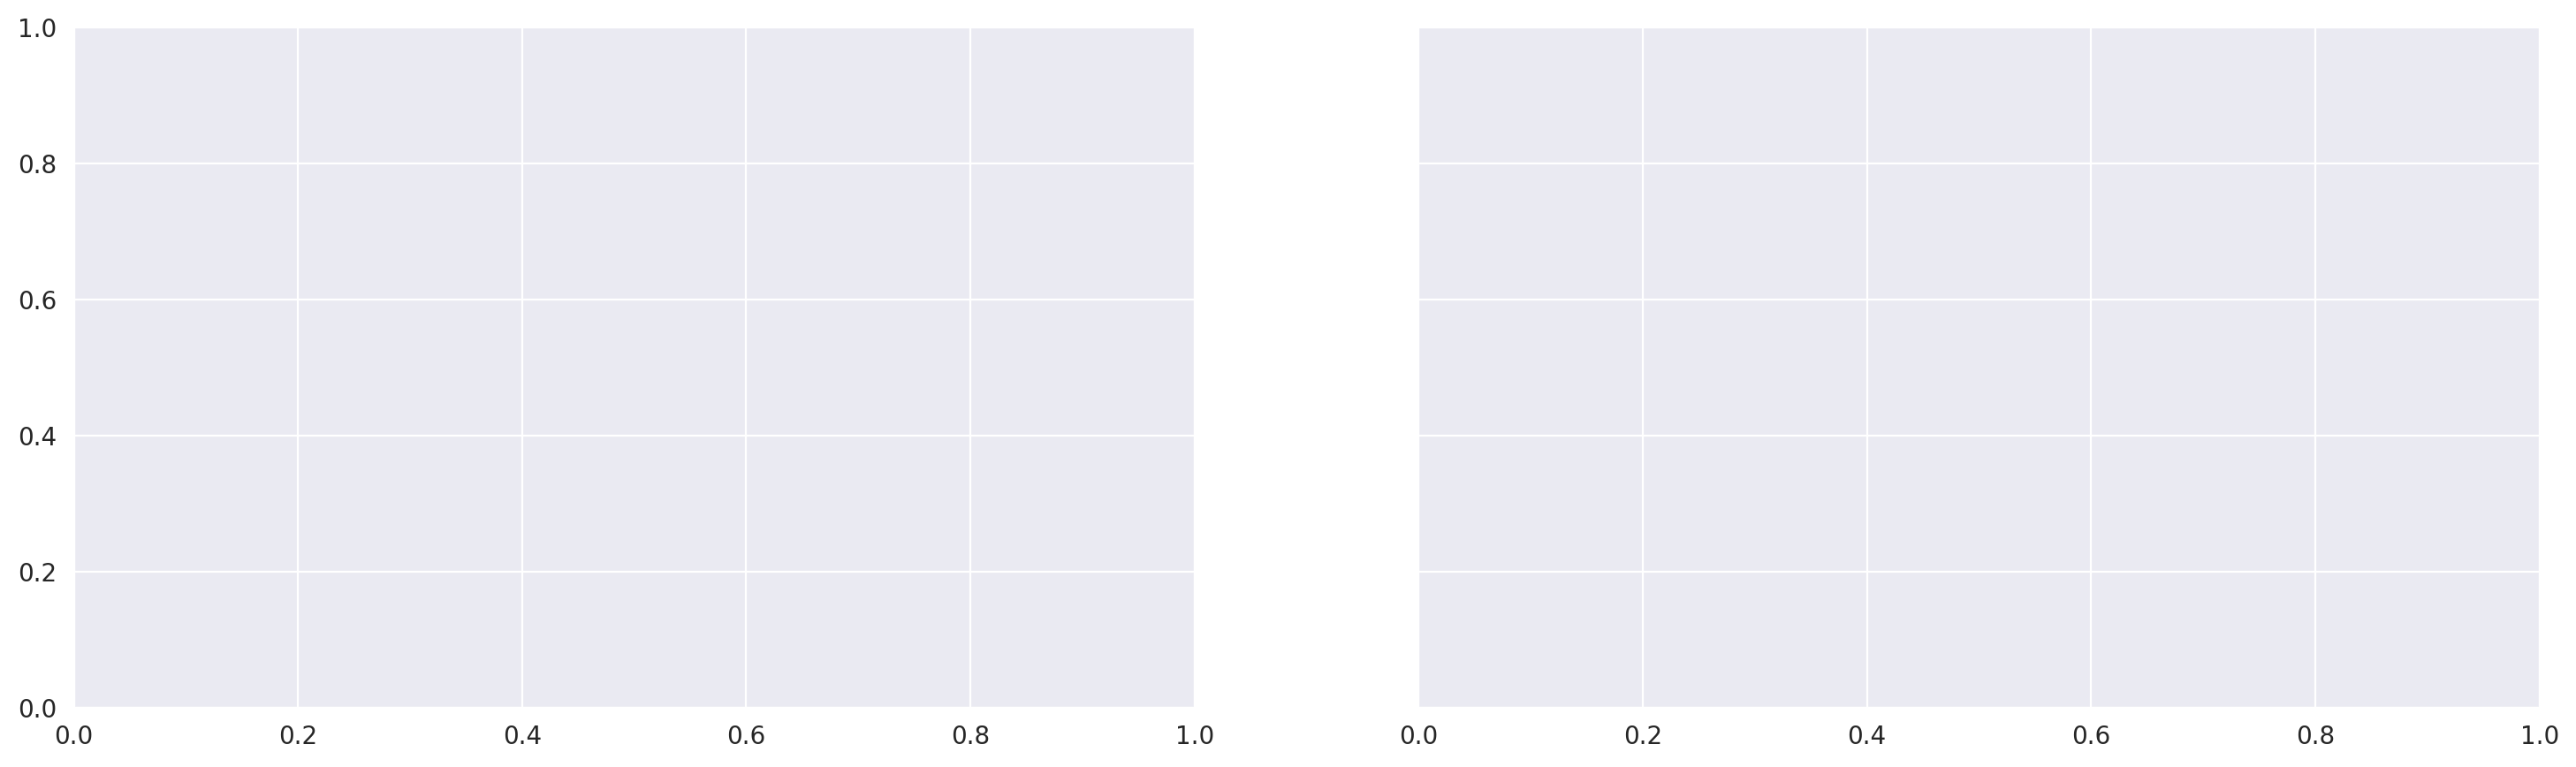

In [7]:
data_temp = load_data("../Output_GU/CIFAR10-*-N100-*/s[1-9].csv")
data_temp2 = load_data("../Output_GU/CIFAR10-*-N100-*/s[1-9][1-9].csv")
data_temp = pd.concat([data_temp, data_temp2])
# data_temp = load_data("../Output_GU/CIFAR10-*-N100-*/s[1-9].csv")


for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(18,5), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        # temp = temp[temp["epoch"] <= 999]
        temp = temp[temp["epoch"] == 999]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        
        replace_icon =   {"GGU122.0": "GGU122", 
                          "GGU121.0": "GGU121", 
                          "GGU901.0": "GGU901", 
                          "GU901.0":  "GU901", 
                          "GGU902.0": "GGU902", 
                          "GU902.0":  "GU902", 
                          "GGU121.01": "01", 
                          "GGU121.01": "01", 
                          "GGU121.03": "03", 
                          "GGU121.05": "05", 
                          "GGU121.07": "07", 
                          "GGU121.09": "09", 
                          }
        
        sk = ["vanilla"] + list(replace_icon.keys())
        # sk = list(replace_icon.keys())
        temp = temp.set_index('Scaling').loc[sk].reset_index()
        temp = temp.replace({"Scaling": replace_icon})
        
        ax = sns.barplot(data=temp, x="Scaling", y="a3", ax=ax, palette="tab10", errorbar="se", linewidth = 0.8)
        # ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Scaling", palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([79, 83])
        ax.set_xlabel("# iters in each unfrozen stage")
        
        break
    
    axes[0].set_ylabel("Test Accuracy (%)")
    axes[1].set_ylabel("")
    
    axes[0].set_title("CIFAR10 (IID label)")
    axes[1].set_title("CIFAR10 (Non-IID label, α=0.3)")
    
    fig.tight_layout()
    plt.pause(0.1)

In [15]:
temp = copy.deepcopy(data_temp)
temp = temp[temp["epoch"] == 999]
temp = temp[(temp["Distribution"] == "IID partition")]
temp[temp["Scaling"]=="vanilla"]["a3"]

99    81.92
99    82.48
99    82.45
99    82.35
99    81.89
99    82.56
99    82.09
99    81.85
99    82.00
Name: a3, dtype: float64

In [17]:
import copy
temp = copy.deepcopy(data_temp)
temp = temp[temp["epoch"] == 999]
temp = temp[(temp["Distribution"] == "IID partition")]
temp[temp["Scaling"]=="GU999.0"]["a3"]

99    82.36
99    81.68
99    81.97
99    81.46
99    81.74
Name: a3, dtype: float64

In [12]:
def set_client_from_params(mdl, params):
    dict_param = copy.deepcopy(dict(mdl.named_parameters()))
    idx = 0
    for name, param in mdl.named_parameters():
        weights = param.data
        length = len(weights.reshape(-1))
        dict_param[name].data.copy_(torch.tensor(params[idx:idx+length].reshape(weights.shape)).to(device))
        idx += length
    
    mdl.load_state_dict(dict_param)    
    return mdl

In [6]:
int(0) == float(0.)

True